# Task 3: Speed-up Analysis

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
def t_best_seq(n):
    return n * np.log(n)

def t_parallel_algo_1(n, p):
    return ((n * np.log(n)) / p) + np.log(n)

def t_parallel_algo_2(n, p):
    return ((n * np.log(n)) / p) + n

In [82]:
INPUT_SIZE_N = 1000
n_processors = [4, 16, 64]

### 3.1 Absolute speed-up

In [83]:
df = pd.DataFrame(n_processors, columns=["p"])
df

,p
0,4
1,16
2,64


In [84]:
speedups_algo_1 = []
speedups_algo_2 = []

for p in n_processors:
    abs_speedup_algo_1 = t_best_seq(INPUT_SIZE_N) / t_parallel_algo_1(INPUT_SIZE_N, p)
    abs_speedup_algo_2 = t_best_seq(INPUT_SIZE_N) / t_parallel_algo_2(INPUT_SIZE_N, p)
    speedups_algo_1.append(abs_speedup_algo_1)
    speedups_algo_2.append(abs_speedup_algo_2)
    print(f"ALGO 1 - Absolute speedup with {p} processors: {abs_speedup_algo_1:.2f}")
    print(f"ALGO 2 - Absolute speedup with {p} processors: {abs_speedup_algo_2:.2f}")

df["speedup_algo_1"] = speedups_algo_1
df["speedup_algo_2"] = speedups_algo_2

ALGO 1 - Absolute speedup with 4 processors: 3.98
ALGO 2 - Absolute speedup with 4 processors: 2.53
ALGO 1 - Absolute speedup with 16 processors: 15.75
ALGO 2 - Absolute speedup with 16 processors: 4.82
ALGO 1 - Absolute speedup with 64 processors: 60.15
ALGO 2 - Absolute speedup with 64 processors: 6.23


In [85]:
df

,p,speedup_algo_1,speedup_algo_2
0,4,3.984064,2.533154
1,16,15.748031,4.824745
2,64,60.150376,6.234809


### 3.2 Parallel efficiency

In [86]:
df["parallel_eff_algo_1"] = df["speedup_algo_1"] / df["p"]
df["parallel_eff_algo_2"] = df["speedup_algo_2"] / df["p"]

df

,p,speedup_algo_1,speedup_algo_2,parallel_eff_algo_1,parallel_eff_algo_2
0,4,3.984064,2.533154,0.996016,0.633288
1,16,15.748031,4.824745,0.984252,0.301547
2,64,60.150376,6.234809,0.939850,0.097419


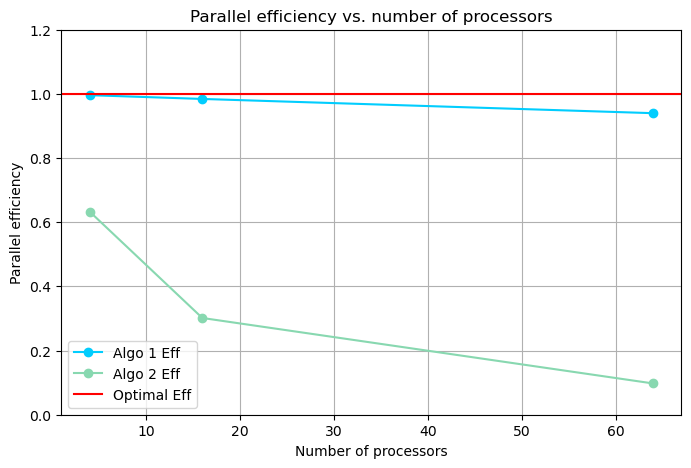

In [87]:
plt.figure(figsize=(8, 5))
plt.plot(df["p"], df["parallel_eff_algo_1"], marker="o", color="#01cdfe", label="Algo 1 Eff")
plt.plot(df["p"], df["parallel_eff_algo_2"], marker="o", color="#88d8b0", label="Algo 2 Eff")
plt.axhline(y=1, color="red", label="Optimal Eff")

plt.title("Parallel efficiency vs. number of processors")
plt.xlabel("Number of processors")
plt.ylabel("Parallel efficiency")
plt.ylim((0, 1.2))
plt.legend()
plt.grid(True)
plt.show()